In [ ]:
# Ryker Dolese, CAAM 210, FALL 2022, Project 11 on Neural Networks
# NeuralNetworks.ipynp
# This script is for the 11th Project on Canvas 
# Last Modified: November 17th, 2022

In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt
import random

In [4]:
def sigmoid(x):
    # Inputs: x (some number)
    # Outputs: none
    # This function uses the sigmoid function, which is then used in our neural function
    s = 1/(1+np.exp(0.5-x)) # sigmoid equation
    return s

In [5]:
def neural(V1, W1, maxiter,rate,TrnD,TrgD):
    # Inputs:
    # - V1 and W1 are the initial weight matrices
    # - maxiter (defines the maximum number of iterations needed to train the neural network)
    # - rate (corresponds to a gradient descent step)
    # - TrnD and TrgD define the training data
    # Outputs:
    # - two weight matrices V, W after successful training at the given rate
    # This function picks a random input pattern from the training data for each iteration, 
    # eventually returning two weight matrices V, W.
    for i in range (0, maxiter):
        N = np.shape(TrnD) # use shape command to find dimensions of matrix N
        j = np.random.randint(N[0]) # pick a random pattern to test with
        p = TrnD[j,:].T # pick a random letter from training data
        q = sigmoid(V1@p) # use our sigmoid function
        o = sigmoid(W1@q) # use our sigmoid function
        tmp = (o-TrgD[j,:].T)@o.T@(1-o) 
        grad_W = tmp@q.T
        grad_V = (W1.T*q*(1-q))@tmp@p.T
        V = V1 - rate*grad_V
        W = W1 - rate*grad_W
        # these lines produce matrices V and W after training
    return V,W

In [6]:
def modify(L):
    # Inputs:
    # - L (a specific letter that is trying to be matched)
    # Outputs: 
    # - Lmod (an array representing a modified letter)
    # This function flips one bit in the letter. For instance, if r = [1111110001100001000010000], then one possibility
    # for modify(r) = [0111110001100001000010000], where you just flip the first component.
    n = np.random.randint(25) #generate a random integer from 0 to 25
    Lmod = np.zeros((L.shape)) # define Lmod array
    Lmod[0,:] = L[0,:] # define Lmod as the same matrix as L
    if Lmod[0,n] == 1:
        Lmod[0,n] = 0 # flip number to 0 if it was initially 1
    if Lmod[0,n] == 0:
        Lmod[0,n] = 1 # flip number to 1 if initially 0
        
    return Lmod

In [9]:
def NeuralNetwork(TrnD,TrgD,maxiter,rate,L):
    # Inputs:
    # - maxiter (defines the maximum number of iterations needed to train the neural network)
    # - rate (corresponds to a gradient descent step)
    # - TrnD and TrgD define the training data
    # - L (an array representing a letter)
    # Outputs:
    # - correct_cnt (the percentage of correct guesses by the function when identifying a letter)
    # This function uses the computed matrices V and W to recognize randomly flipped letter ’e’.   
    np.random.seed(0) # creating pseudo-random numbers
    V1 = np.random.standard_normal(size = (25, 25))
    np.random.seed(0)
    W1 = np.random.standard_normal(size = (2, 25)) # making the process random
    [V, W] = neural(V1, W1, maxiter,rate,TrnD,TrgD) #calling our neural function
    count = 0 # start w zero correct answers
    for n in range (0,100):
        Lmod = modify(L) # modify the letter using modify
        q = sigmoid(V@Lmod.T)# calling our sigmoid function
        val = sigmoid(W@q)
        if np.round_(val[0])==1 and np.round_(val[1])==1: # if letter identified matches modified letter
            count=count+1 # add to count of correct answers
        else:
            count=count # else keep count the same
    correct_cnt=(count/100)*100 # make it a percent
    return correct_cnt

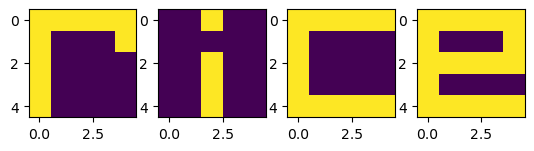

Correct% = 100.0


In [10]:
#DRIVER
r = np.array([1,1,1,1,1,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0]) # create array representing letter r
r = np.reshape(r,(5,5)) # rehape into 5X5 matrix
plt.figure(1) # produce figure
plt.subplot(1,4,1) # place in first position of subplot
plt.imshow(r) # use imshow to show the nonzero entries
# Repeat for i,c,e to spell out rice
i = np.array([0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0])
i = np.reshape(i,(5,5))
plt.subplot(1,4,2)
plt.imshow(i)
c = np.array([1,1,1,1,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,1,1,1])
plt.subplot(1,4,3)
c = np.reshape(c,(5,5))
plt.imshow(c)
e = np.array([1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,0,0,0,0,1,1,1,1,1])
plt.subplot(1,4,4)
e = np.reshape(e,(5,5))
plt.imshow(e)
plt.show(1) # show the beautiful plot!

# redefine the letters as arrays
r = np.array([1,1,1,1,1,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0])
i = np.array([0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0])
c = np.array([1,1,1,1,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,1,1,1])
e = np.array([1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,0,0,0,0,1,1,1,1,1])

TrnD = np.array([ [r], [i], [c], [e]]) # make our arrays 2d
TrgD = np.array([ [[0,0]], [[0,1]], [[1,0]], [[1,1]] ]) # make our arrays 3d

correct_cnt = NeuralNetwork(TrnD,TrgD,5000,0.1,TrnD[3,:]) # run Neural network for the letter 'e'
print('Correct% = '+str(correct_cnt)) # print the correct %